In [2]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
# Create tensors. As for learning we need to compute the gradient also, so we use tensors  

x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=False)

# Build a computational graph.
a = w*x
y = a + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print("dx: ",x.grad)    # x.grad = 2 
print("dw: ",w.grad)    # w.grad = 1 
print("b: ",b)    # b.grad = 1 
print("x: ", x)
print(b.grad)

dx:  tensor(2.)
dw:  tensor(1.)
b:  tensor(3.)
x:  tensor(1., requires_grad=True)
None


In [3]:
input = torch.randn(10, 3)#Note:10 is the number of examples and 3 is no. of feature 
output = torch.randn(10,2)#no. of output elements is 2(for an example), total examples 10

c = nn.Linear(3,2)#takes 3 no. of input feature and gives 2 output feature
print("W:",c.weight)
print("b:", c.bias)

W: Parameter containing:
tensor([[ 0.3043, -0.5016, -0.2386],
        [ 0.0296,  0.1085, -0.1317]], requires_grad=True)
b: Parameter containing:
tensor([0.5423, 0.0027], requires_grad=True)


In [4]:
#torch to numpy and Vice versa
a = torch.randn(2,2)
c = a.numpy()
d = torch.from_numpy(c)

print("The value of a is: ",a)
print("The value of c is: ",c)
print("The value of d is: ",d)

The value of a is:  tensor([[-0.8575,  1.3380],
        [ 0.0211, -0.2638]])
The value of c is:  [[-0.85748863  1.3379784 ]
 [ 0.02113914 -0.2638441 ]]
The value of d is:  tensor([[-0.8575,  1.3380],
        [ 0.0211, -0.2638]])


In [5]:
#Linear Regression 

input_size = 1
output_size = 1
num_epochs = 50
learning_rate = 0.001

#sample dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
print("The shape of X is: ", x_train.shape)

model = nn.Linear(input_size, output_size)

criterion = nn.MSELoss()#used to set the Loss. Here we have set Mean Square Error Loss
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)#this is used to set the optimizer you use to update the params

for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_train)
    outputs = model(inputs)#input is passed to the data
    loss = criterion(outputs, labels)#loss is computed here. Above we have just set the type of loss
    optimizer.zero_grad()#It is always important set the gradient as zero before back propagating. 
    loss.backward()#now all the gradients are computed with respect to loss. In graph if you see it computes the derivative of the parameter which is used to calculate the loss
    optimizer.step()#To update the parametes
    
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


The shape of X is:  (15, 1)
Epoch [10/50], Loss: 4.9680
Epoch [20/50], Loss: 0.9578
Epoch [30/50], Loss: 0.2997
Epoch [40/50], Loss: 0.1916
Epoch [50/50], Loss: 0.1739


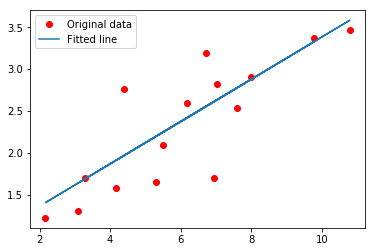

In [6]:
#continuation of above, plotting the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()